In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [110]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [112]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [113]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Задание №1

In [114]:
for pclass in range(1, 4):
    print(f"For {pclass} pclass")

    women = train_data.loc[(train_data.Pclass == pclass) & (train_data.Sex == 'female')]["Survived"]
    men = train_data.loc[(train_data.Pclass == pclass) & (train_data.Sex == 'male')]["Survived"]

    print("\t% of women who survived:", sum(women)/len(women))
    print("\t% of men who survived:", sum(men)/len(men))

For 1 pclass
	% of women who survived: 0.9680851063829787
	% of men who survived: 0.36885245901639346
For 2 pclass
	% of women who survived: 0.9210526315789473
	% of men who survived: 0.1574074074074074
For 3 pclass
	% of women who survived: 0.5
	% of men who survived: 0.13544668587896252


Задание №2

In [115]:
train_data[train_data.Sex == 'female'].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,314.000000,314.000000,314.000000,261.000000,314.000000,314.000000,314.000000
mean,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
std,256.846324,0.438211,0.857290,14.110146,1.156520,1.022846,57.997698
min,2.000000,0.000000,1.000000,0.750000,0.000000,0.000000,6.750000
25%,231.750000,0.000000,1.000000,18.000000,0.000000,0.000000,12.071875
50%,414.500000,1.000000,2.000000,27.000000,0.000000,0.000000,23.000000
75%,641.250000,1.000000,3.000000,37.000000,1.000000,1.000000,55.000000
max,889.000000,1.000000,3.000000,63.000000,8.000000,6.000000,512.329200


In [116]:
train_data[train_data.Sex == 'male'].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,577.000000,577.000000,577.000000,453.000000,577.000000,577.000000,577.000000
mean,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893
std,257.486139,0.391775,0.813580,14.678201,1.061811,0.612294,43.138263
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,464.000000,0.000000,3.000000,29.000000,0.000000,0.000000,10.500000
75%,680.000000,0.000000,3.000000,39.000000,0.000000,0.000000,26.550000
max,891.000000,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


Задание №3

In [117]:
for embarked in ['C', 'Q', 'S']:
    print(f"For {embarked} pclass")

    s = train_data.loc[(train_data.Embarked == embarked)]["Survived"]

    print("\t% who survived:", sum(s)/len(s))


For C pclass
	% who survived: 0.5535714285714286
For Q pclass
	% who survived: 0.38961038961038963
For S pclass
	% who survived: 0.33695652173913043


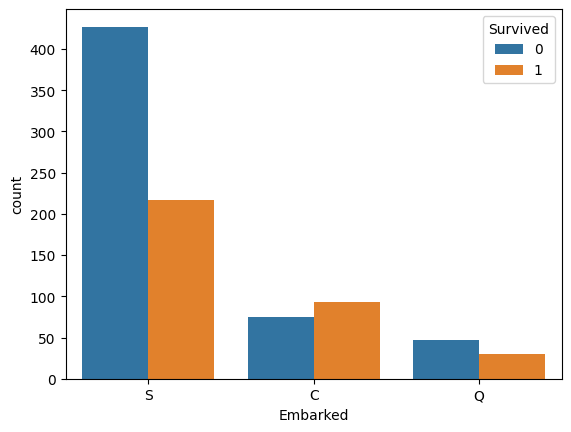

In [118]:
sns.countplot(x = 'Embarked', hue = 'Survived', data = train_data);

Можно предположить, что в порте Southampton более высокий процент выживаймости

Задание №4

In [119]:
names = train_data['Name'].str.split(',', expand=True)
train_data['First_name'] = names[0]
train_data['Last_name'] = names[1]
train_data = train_data.drop(columns=['Name'])
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First_name,Last_name
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


In [120]:
train_data['First_name'].value_counts()[:10]

Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
Goodwin      6
Johnson      6
Rice         5
Lefebre      4
Asplund      4
Name: First_name, dtype: int64

In [121]:
train_data['Last_name'].value_counts()[:10]

 Mr. John             7
 Mr. James            7
 Miss. Mary           6
 Mr. William          6
 Mr. William John     4
 Miss. Bertha         4
 Mr. Ivan             4
 Mr. William Henry    4
 Miss. Anna Sofia     3
 Mr. George           3
Name: Last_name, dtype: int64

Задание №5

In [122]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  First_name   891 non-null    object 
 12  Last_name    891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [123]:

train_data['Age'].fillna(train_data['Age'].median(), inplace = True)
train_data['Cabin'].fillna(train_data['Cabin'].mode()[0], inplace = True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  First_name   891 non-null    object 
 12  Last_name    891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


ЗАдание №6

In [124]:
test_data = pd.read_csv("test.csv")

In [126]:
y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Задание №7

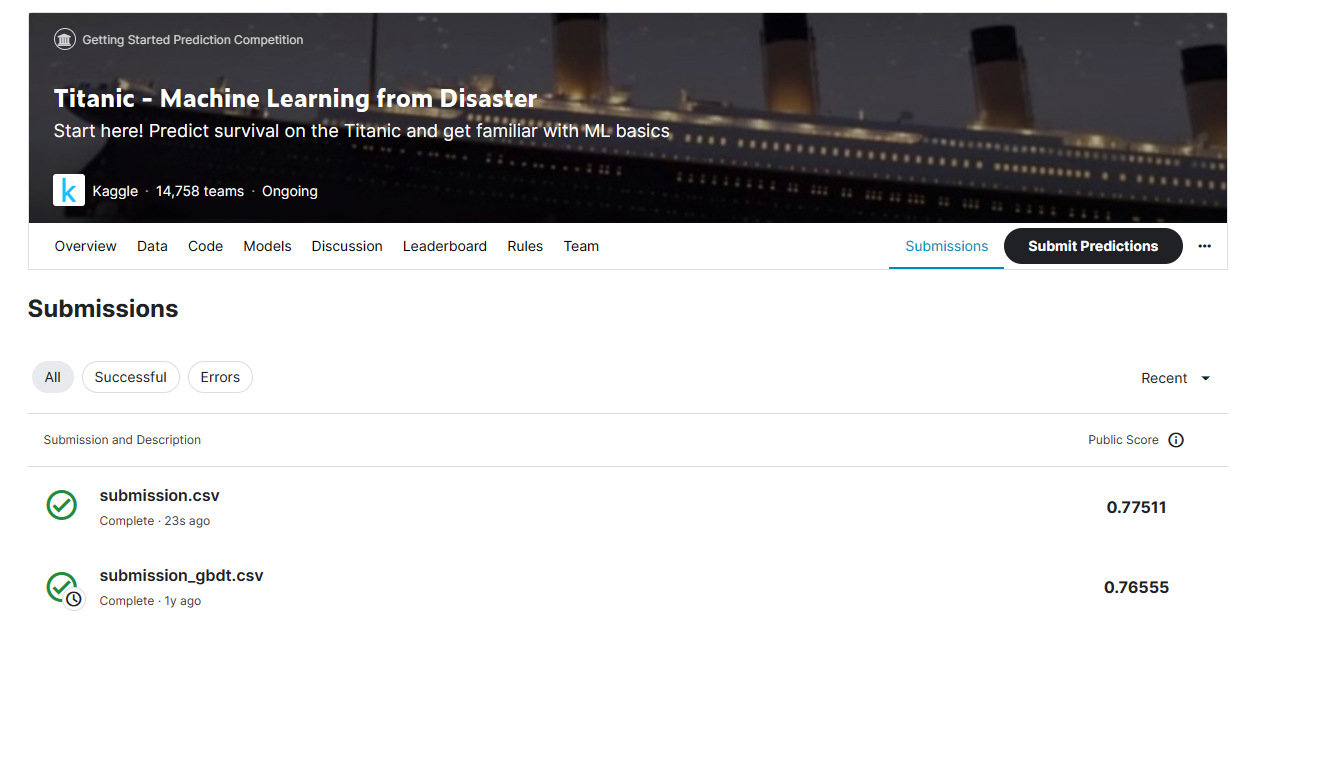

Задание №8

In [136]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


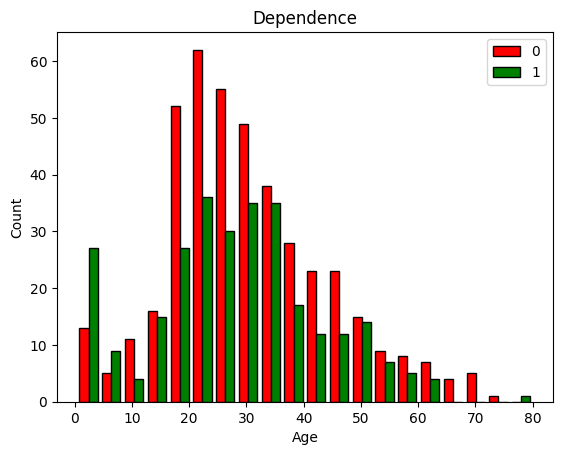

In [149]:
plt.hist([train_data[train_data['Survived'] == 0]['Age'], train_data[train_data['Survived'] == 1]['Age']],
         color = ['red', 'green'], edgecolor = 'black', bins = int(100/5), label=['0', '1'])
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Dependence')
plt.show()